In [3]:
#      迭代邻近点 icp            3d 点云 匹配
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt  
import networkx as nx
import array
import re
import codecs

def best_fit_transform(A, B):
    '''
    Calculates the least-squares best-fit transform that maps corresponding points A to B in m spatial dimensions
    Input:
      A: Nxm numpy array of corresponding points
      B: Nxm numpy array of corresponding points
    Returns:
      T: (m+1)x(m+1) homogeneous transformation matrix that maps A on to B
      R: mxm rotation matrix
      t: mx1 translation vector
    '''

    assert A.shape == B.shape

    # get number of dimensions
    m = A.shape[1]

    # translate points to their centroids
    centroid_A = np.mean(A, axis=0)
    centroid_B = np.mean(B, axis=0)
    AA = A - centroid_A
    BB = B - centroid_B

    # rotation matrix
    H = np.dot(AA.T, BB)
    U, S, Vt = np.linalg.svd(H)
    R = np.dot(Vt.T, U.T)

    # special reflection case
    if np.linalg.det(R) < 0:
       Vt[m-1,:] *= -1
       R = np.dot(Vt.T, U.T)

    # translation
    t = centroid_B.T - np.dot(R,centroid_A.T)

    # homogeneous transformation
    T = np.identity(m+1)
    T[:m, :m] = R
    T[:m, m] = t

    return T, R, t


def nearest_neighbor(src, dst):
    '''
    Find the nearest (Euclidean) neighbor in dst for each point in src
    Input:
        src: Nxm array of points
        dst: Nxm array of points
    Output:
        distances: Euclidean distances of the nearest neighbor
        indices: dst indices of the nearest neighbor
    '''

    assert src.shape == dst.shape

    neigh = NearestNeighbors(n_neighbors=1)
    neigh.fit(dst)
    distances, indices = neigh.kneighbors(src, return_distance=True)
    return distances.ravel(), indices.ravel()


def icp(A, B, init_pose=None, max_iterations=20, tolerance=0.001):
    '''
    The Iterative Closest Point method: finds best-fit transform that maps points A on to points B
    Input:
        A: Nxm numpy array of source mD points
        B: Nxm numpy array of destination mD point
        init_pose: (m+1)x(m+1) homogeneous transformation
        max_iterations: exit algorithm after max_iterations
        tolerance: convergence criteria
    Output:
        T: final homogeneous transformation that maps A on to B
        distances: Euclidean distances (errors) of the nearest neighbor
        i: number of iterations to converge
    '''
    

    assert A.shape == B.shape

    # get number of dimensions
    m = A.shape[1]

    # make points homogeneous, copy them to maintain the originals
    src = np.ones((m+1,A.shape[0]))
    dst = np.ones((m+1,B.shape[0]))
    src[:m,:] = np.copy(A.T)
    dst[:m,:] = np.copy(B.T)

    # apply the initial pose estimation
    if init_pose is not None:
        src = np.dot(init_pose, src)

    prev_error = 0

    for i in range(max_iterations):
        # find the nearest neighbors between the current source and destination points
        distances, indices = nearest_neighbor(src[:m,:].T, dst[:m,:].T)

        # compute the transformation between the current source and nearest destination points
        T,_,_ = best_fit_transform(src[:m,:].T, dst[:m,indices].T)

        # update the current source
        src = np.dot(T, src)

        # check error
        mean_error = np.mean(distances)
        if np.abs(prev_error - mean_error) < tolerance:
            break
        prev_error = mean_error

    # calculate final transformation
    T,_,_ = best_fit_transform(A, src[:m,:].T)
    print T 
    print distances 
    print i 
    
    
    return T, distances, i



allList=[]
allList2=[]
allList3=[]
A = np.loadtxt('/Users/ruanmingzhe/Desktop/icbeb/DATAS/data3/skeletonCorenode.txt')
B = np.loadtxt('/Users/ruanmingzhe/Desktop/icbeb/DATAS/data3/skeletonCorenodeSecond.txt')
C = np.loadtxt('/Users/ruanmingzhe/Desktop/icbeb/DATAS/data3/skeletonCorenode.txt')
for line in A:
    List=[]
    temporary = str(int(line))
    line = temporary.zfill(6)
    b=re.findall(r'.{3}',line)
    c=','.join(b)
    a = int(c.split(',')[0])
    d = int(c.split(',')[1])
#     c = int(c.split(',')[2])
    List.append(a)
    List.append(d)
#     List.append(c)
    allList.append(List)
    np.array(allList)

    
    
for line in B:
    List2=[]
    temporary = str(int(line))
    line = temporary.zfill(6)
    u=re.findall(r'.{3}',line)
    m=','.join(u)
    o = int(m.split(',')[0])
    p = int(m.split(',')[1])
#     u = int(m.split(',')[2])
    List2.append(o)
    List2.append(p)
#     List2.append(u)
    allList2.append(List2)
    np.array(allList2)


A = np.array(allList).reshape(47,2)
B = np.array(allList2).reshape(47,2)

print A , B

for line in C:
    List3=[]
    temporary = str(int(line))
    line = temporary.zfill(9)
    j=re.findall(r'.{3}',line)
    cc=','.join(j)
    aa = int(cc.split(',')[0])
    dd = int(cc.split(',')[1])
    bb = int(cc.split(',')[2])
    List3.append(aa)
    List3.append(dd)
    List3.append(bb)
    allList3.append(List3)
    np.array(allList3)
C = np.array(allList3).reshape(47,3)

icp(A, B, init_pose=None, max_iterations=20, tolerance=0.001)
TT = [[1,2.203640915576785e-17,0],[-1.729844566200619e-16,1,0],[0,0,1]]
ICP = np.dot(C,TT )
for i in range(6):
    print int(ICP[i][0]) , 
    print int(ICP [i][1]),
    print int(ICP[i][2])





[[553 360]
 [140 437]
 [148 433]
 [155 167]
 [156 427]
 [159 435]
 [160 429]
 [174 377]
 [193 417]
 [195 420]
 [203 390]
 [212 401]
 [218 427]
 [225 424]
 [228 428]
 [228 430]
 [229 429]
 [230 412]
 [235 425]
 [238 305]
 [238 412]
 [240 418]
 [242 408]
 [243 397]
 [252 412]
 [253 415]
 [273 423]
 [277 420]
 [282 414]
 [288 413]
 [318 367]
 [332 395]
 [334 470]
 [336 468]
 [339 475]
 [341 481]
 [353 493]
 [353 500]
 [356 497]
 [357 158]
 [358 503]
 [359 501]
 [377 349]
 [378 240]
 [380 345]
 [424 186]
 [435 427]] [[653 470]
 [150 448]
 [158 444]
 [165 178]
 [166 438]
 [169 446]
 [170 440]
 [184 388]
 [203 428]
 [205 431]
 [213 401]
 [222 412]
 [228 438]
 [235 435]
 [238 439]
 [238 441]
 [239 440]
 [240 423]
 [245 436]
 [248 316]
 [248 423]
 [250 429]
 [252 419]
 [253 408]
 [262 423]
 [263 426]
 [283 434]
 [287 431]
 [292 425]
 [298 424]
 [328 378]
 [342 406]
 [344 481]
 [346 479]
 [349 486]
 [351 492]
 [363 504]
 [363 511]
 [366 508]
 [367 169]
 [368 514]
 [369 512]
 [387 360]
 [388 251

[[ 90.  94. 103. 106. 109. 111. 116. 121. 139. 140. 147. 148. 149. 150.
  154. 160. 168. 184. 190. 193. 194. 196. 198. 201. 202. 204. 209. 210.
  216. 216. 216. 226. 230. 233. 233. 238. 239. 243. 244. 253. 255. 256.
  263. 264. 280. 281. 284. 288. 291. 296. 301. 303. 309. 310. 311. 323.
  337. 341. 341. 343. 344. 345. 345. 348. 349. 364. 368. 381. 382. 386.
  387. 393. 394. 397. 404. 406. 409. 410. 411. 413. 416. 428. 430. 437.
  443. 469. 473. 485. 509. 512.]
 [240. 262. 300. 359. 321. 415. 250. 414. 188. 177. 340. 202. 319. 195.
  353. 323. 184. 406. 527. 184. 161. 181. 415. 180. 141. 283. 201. 426.
  276. 316. 397. 349. 320. 159. 371. 360. 386. 220. 402. 208. 418. 419.
  460. 462. 173. 170. 150. 136. 157. 166. 272. 149. 149. 175. 527. 150.
  144. 536. 545. 564. 181. 560. 578. 498. 558. 343. 369. 452. 278. 446.
  388. 396. 177. 201. 395. 392. 510. 419. 540. 538. 551. 590. 506. 379.
  246. 371. 463. 381. 387. 383.]]
[[ 94. 103. 106. 109. 111. 116. 121. 139. 140. 147. 147. 148. 149. 15

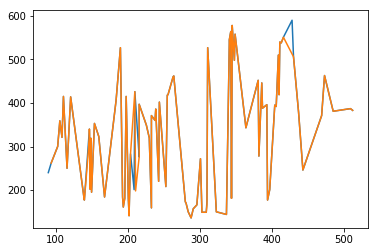

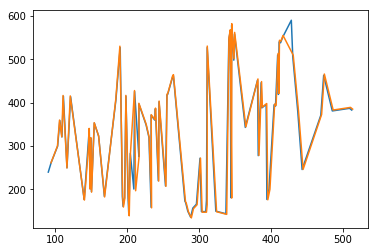

1.0085599677138122
nan
-0.13931011655356104
[[ 1.00426792e+00 -2.43141782e-03  4.75288928e-02]
 [ 2.33391090e-03  1.01282052e+00 -3.99685650e+00]]


/Users/ruanmingzhe/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:153: RuntimeWarning: invalid value encountered in arccos


In [2]:
# -*- coding: utf-8 -*-           ICP-2d arithmetic for registration
# -*- author: steven ruan -*-
# -*- date:4/6/2018 -*-
import cv2
import numpy as np
import sys
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt  
import networkx as nx
import array
import re
import codecs


def del_miss(indeces, dist, max_dist, th_rate = 0.8):
    th_dist = max_dist * th_rate
    return np.array([indeces[0][np.where(dist.T[0] < th_dist)]])

def is_converge(Tr, scale):
    delta_angle = 0.0001
    delta_scale = scale * 0.0001
    
    min_cos = 1 - delta_angle
    max_cos = 1 + delta_angle
    min_sin = -delta_angle
    max_sin = delta_angle
    min_move = -delta_scale
    max_move = delta_scale
    
    return min_cos < Tr[0, 0] and Tr[0, 0] < max_cos and \
           min_cos < Tr[1, 1] and Tr[1, 1] < max_cos and \
           min_sin < -Tr[1, 0] and -Tr[1, 0] < max_sin and \
           min_sin < Tr[0, 1] and Tr[0, 1] < max_sin and \
           min_move < Tr[0, 2] and Tr[0, 2] < max_move and \
           min_move < Tr[1, 2] and Tr[1, 2] < max_move

def icp(d1, d2, max_iterate = 100):
    src = np.array([d1.T], copy=True).astype(np.float32)
    dst = np.array([d2.T], copy=True).astype(np.float32)
    
    knn = cv2.ml.KNearest_create()
    responses = np.array(range(len(d2[0]))).astype(np.float32)
    
    knn.train(src[0],cv2.ml.ROW_SAMPLE, responses)
    
    Tr = np.array([[np.cos(0), -np.sin(0), 0],
                   [np.sin(0), np.cos(0),  0],
                   [0,         0,          1]])

    dst = cv2.transform(dst, Tr[0:2])
    max_dist = sys.maxint
    
    scale_x = np.max(d1[0]) - np.min(d1[0])
    scale_y = np.max(d1[1]) - np.min(d1[1])
    scale = max(scale_x, scale_y)
    
    for i in range(max_iterate):
        ret, results, neighbours, dist = knn.findNearest(dst[0], 1)
        
        indeces = results.astype(np.int32).T     
        indeces = del_miss(indeces, dist, max_dist)  
        
        T = cv2.estimateRigidTransform(dst[0, indeces], src[0, indeces], True)  
        
        max_dist = np.max(dist)
        
        dst = cv2.transform(dst, T)
        Tr = np.dot(np.vstack((T,[0,0,1])), Tr)
        
        if (is_converge(T, scale)):
            break
        
    return Tr[0:2]


if __name__ == "__main__":
    import matplotlib.pyplot as plt

# ------------------  deal with the input data   ------------------ #

allList=[]
allList2=[]
allList3=[]
Lista = []
Listd =[]

pathfirst = '/Users/ruanmingzhe/Desktop/Data/data3/image1skeletonDataChangeCorenode.txt'
pathsecond = '/Users/ruanmingzhe/Desktop/Data/data3/image2skeletonDataChangeCorenode.txt'

A = np.loadtxt(pathfirst)
B = np.loadtxt(pathsecond)
C = np.loadtxt(pathfirst)

for line in A:
    List=[]
    temporary = str(int(line))
    line = temporary.zfill(9)
    b=re.findall(r'.{3}',line)
    c=','.join(b)
    a = int(c.split(',')[0])
    d = int(c.split(',')[1])
#     c = int(c.split(',')[2])
    Lista.append(a)
    Listd.append(d)
#     List.append(c)
    allList.append(List)
    np.array(allList)
d1 = np.array([Lista, Listd]).astype(np.float32)

print d1

List2o = []
List2p = []
for line in B:
    List2=[]
    temporary = str(int(line))
    line = temporary.zfill(9)
    u=re.findall(r'.{3}',line)
    m=','.join(u)
    o = int(m.split(',')[0])
    p = int(m.split(',')[1])
    List2o.append(o)
    List2p.append(p)
    allList2.append(List2)
    np.array(allList2)
d2 = np.array([List2o, List2p]).astype(np.float32)
print d2

for line in C:
    List3=[]
    temporary = str(int(line))
    line = temporary.zfill(9)
    j=re.findall(r'.{3}',line)
    cc=','.join(j)
    aa = int(cc.split(',')[0])
    dd = int(cc.split(',')[1])
    bb = int(cc.split(',')[2])    
    List3.append(aa)
    List3.append(dd)
    List3.append(bb)
    allList3.append(List3)
    np.array(allList3)
C = np.array(allList3).reshape(90,3)

plt.plot(d1[0], d1[1])
plt.plot(d2[0], d2[1])
plt.show()

ret = icp(d1, d2)

plt.plot(d1[0], d1[1])
dst = np.array([d2.T], copy=True).astype(np.float32)
dst = cv2.transform(dst, ret)
plt.plot(dst[0].T[0], dst[0].T[1])
plt.show()

print ret[0][0] * ret[0][0] + ret[0][1] * ret[0][1]
print np.arccos(ret[0][0]) / 2 / np.pi * 360
print np.arcsin(ret[0][1]) / 2 / np.pi * 360

print ret


# 问题有可能出现在顺序上
# 如果没有出现第二张匹配图，有可能匹配不出好的结果

[[ 611.  611.  620. ... 1111. 1118. 1118.]
 [ 214.  214.  214. ...  227.  359.  359.]]
[[ 36.  36.  45. ... 536. 543. 543.]
 [204. 204. 204. ... 217. 349. 349.]]


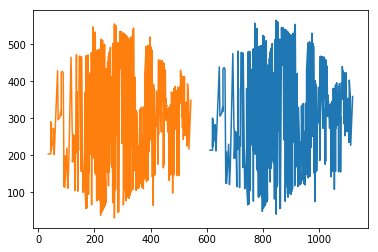

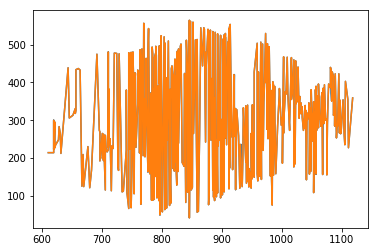

[ 611.0026   611.0026   620.0027   620.00275  620.00275  620.0027
  620.0027   622.00275  622.00275  622.0027   622.0027   623.0027
  623.0027   628.00275  628.00275  629.00275  631.00275  631.00275
  632.00275  632.00275  644.0029   646.00287  652.0029   652.0029
  656.0029   656.0029   656.0029   656.0029   657.0029   657.0029
  657.003    661.00305  664.00305  667.0028   667.0028   669.0029
  670.0028   677.0029   680.00287  680.00287  683.0029   692.0032
  696.00305  696.00305  697.00305  697.00305  697.003    701.00305
  701.00305  701.00305  701.00305  702.00305  702.00305  703.00305
  703.0031   703.0031   706.003    706.003    706.0031   706.0031
  707.00305  709.00305  709.00305  711.0031   711.0033   711.0033
  711.0031   711.0033   711.0031   711.0031   711.0031   712.00323
  712.0031   714.0031   716.00305  716.00305  717.0031   717.0031
  719.0032   719.0032   721.0033   725.00336  727.0031   728.0031
  729.00336  729.00336  734.0031   736.0031   741.00323  741.00323
  741

/Users/ruanmingzhe/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:161: RuntimeWarning: invalid value encountered in arccos


In [22]:
# -*- coding: utf-8 -*-           ICP-2d arithmetic for registration
# -*- author: steven ruan -*-
# -*- date:4/6/2018 -*-
import cv2
import numpy as np
import sys
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt  
import networkx as nx
import array
import re
import codecs
import os

def del_miss(indeces, dist, max_dist, th_rate = 0.8):
    th_dist = max_dist * th_rate
    return np.array([indeces[0][np.where(dist.T[0] < th_dist)]])

def is_converge(Tr, scale):
    delta_angle = 0.0001
    delta_scale = scale * 0.0001
    
    min_cos = 1 - delta_angle
    max_cos = 1 + delta_angle
    min_sin = -delta_angle
    max_sin = delta_angle
    min_move = -delta_scale
    max_move = delta_scale
    
    return min_cos < Tr[0, 0] and Tr[0, 0] < max_cos and \
           min_cos < Tr[1, 1] and Tr[1, 1] < max_cos and \
           min_sin < -Tr[1, 0] and -Tr[1, 0] < max_sin and \
           min_sin < Tr[0, 1] and Tr[0, 1] < max_sin and \
           min_move < Tr[0, 2] and Tr[0, 2] < max_move and \
           min_move < Tr[1, 2] and Tr[1, 2] < max_move

def icp(d1, d2, max_iterate = 100):
    src = np.array([d1.T], copy=True).astype(np.float32)
    dst = np.array([d2.T], copy=True).astype(np.float32)
    
    knn = cv2.ml.KNearest_create()
    responses = np.array(range(len(d2[0]))).astype(np.float32)
    
    knn.train(src[0],cv2.ml.ROW_SAMPLE, responses)
    
    Tr = np.array([[np.cos(0), -np.sin(0), 0],
                   [np.sin(0), np.cos(0),  0],
                   [0,         0,          1]])

    dst = cv2.transform(dst, Tr[0:2])
    max_dist = sys.maxint
    
    scale_x = np.max(d1[0]) - np.min(d1[0])
    scale_y = np.max(d1[1]) - np.min(d1[1])
    scale = max(scale_x, scale_y)
    
    for i in range(max_iterate):
        ret, results, neighbours, dist = knn.findNearest(dst[0], 1)
        
        indeces = results.astype(np.int32).T     
        indeces = del_miss(indeces, dist, max_dist)  
        
        T = cv2.estimateRigidTransform(dst[0, indeces], src[0, indeces], True)  
        
        max_dist = np.max(dist)
        
        dst = cv2.transform(dst, T)
        Tr = np.dot(np.vstack((T,[0,0,1])), Tr)
        
        if (is_converge(T, scale)):
            break
        
    return Tr[0:2]


if __name__ == "__main__":
    import matplotlib.pyplot as plt

# ------------------  deal with the input data   ------------------ #

allList=[]
allList2=[]
allList3=[]
Lista = []
Listd =[]

A = open('/Users/ruanmingzhe/Desktop/icbeb/DATAS/data4/skeletonCorenodeSift.txt')
B = open('/Users/ruanmingzhe/Desktop/icbeb/DATAS/data4/skeletonCorenodeSecondSift.txt')
C = open('/Users/ruanmingzhe/Desktop/icbeb/DATAS/data4/skeletonCorenodeSift.txt')






for line in A:
    List=[]
    temporary = str(line)
    a = int(temporary.split(',')[0])
    d = int(temporary.split(',')[1])
#     c = int(c.split(',')[2])
    Lista.append(a)
    Listd.append(d)
#     List.append(c)
    allList.append(List)
    np.array(allList)
d1 = np.array([Lista, Listd]).astype(np.float32)


print d1

A.close()



List2o = []
List2p = []
for line in B:
    List2=[]
    temporary = str(line)
    o = int(temporary.split(',')[0])
    p = int(temporary.split(',')[1])
    List2o.append(o)
    List2p.append(p)
    allList2.append(List2)
    np.array(allList2)
d2 = np.array([List2o, List2p]).astype(np.float32)
print d2


B.close()
"""
for line in C:
    List3=[]
    temporary = str(line)
    aa = int(temporary.split(',')[0])
    dd = int(temporary.split(',')[1])
    bb = int(temporary.split(',')[2])    
    List3.append(aa)
    List3.append(dd)
    List3.append(bb)
    allList3.append(List3)
    np.array(allList3)
C = np.array(allList3).reshape(19,3)
"""
plt.plot(d1[0], d1[1])
plt.plot(d2[0], d2[1])
plt.show()

ret = icp(d1, d2)

plt.plot(d1[0], d1[1])
dst = np.array([d2.T], copy=True).astype(np.float32)
dst = cv2.transform(dst, ret)
plt.plot(dst[0].T[0], dst[0].T[1])
plt.show()

# print d1[0], d1[1]
# print d2[0], d2[1]


print dst[0].T[0]
print dst[0].T[1]

print ret[0][0] * ret[0][0] + ret[0][1] * ret[0][1]
print np.arccos(ret[0][0]) / 2 / np.pi * 360
print np.arcsin(ret[0][1]) / 2 / np.pi * 360

print ret


# 问题有可能出现在顺序上
# 如果没有出现第二张匹配图，有可能匹配不出好的结果

In [ ]:
import cv2
import numpy as np
print "1"
img = cv2.imread('/Users/ruanmingzhe/Desktop/datas/data1/skeleton.bmp')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
 
kp = sift.detect(gray,None)#找到关键点
 
img=cv2.drawKeypoints(gray,kp,img)#绘制关键点
 
cv2.imshow('sp',img)
cv2.waitKey(0)

1
